## Lab 6 Report

Hsuan-Chung Hung, Scott Lin, Charles Tung Fang

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal
import simpleaudio as sa
import decimal
import csv

## Summary

This lab investigate two important Fourier Transform applications: filtering and modulation. There are 4 assignments done in this lab: Filtering, Amplitude Modulation, Amplitude Demodulation, Decoding a Morse Code Message.

C:\Users\kevin\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1551: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


<IPython.core.display.Javascript object>


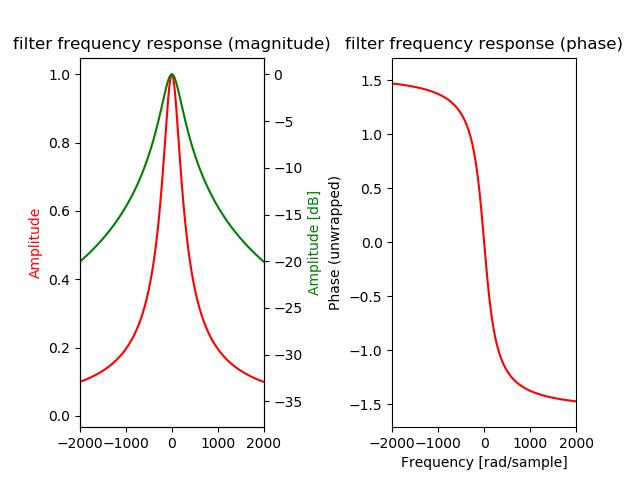

C:\Users\kevin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


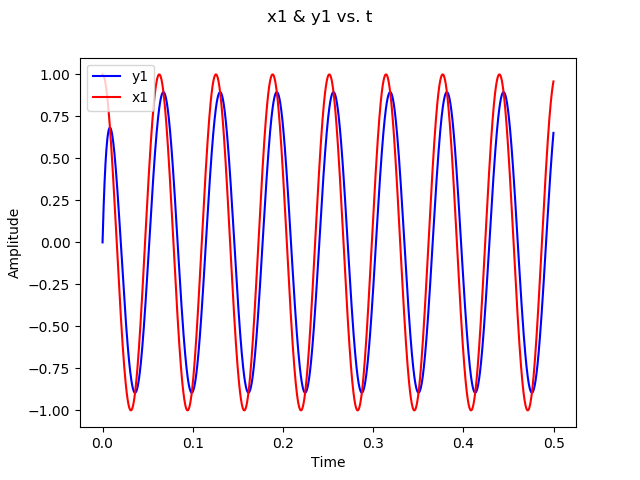

In [2]:
# Assignment 1 -  Filtering
#Part A
fs = 4000
t = np.arange(0, 0.5, 1/fs)
x1t = np.cos(100*t)

#Part B
b = [0, 200]
a = [1, 200]
sys = signal.lti(b,a)
nfft = 4096
f = np.arange(-nfft/2,nfft/2,1)*fs/nfft
w = f * 2 * np.pi
w2, h_f = signal.freqresp(sys, w)
angle = np.unwrap(np.angle(h_f))

fig = plt.figure(1)
fig.subplots_adjust(hspace = 1.5, wspace = 0.7)

plt.subplot(1, 2, 1)
plt.title('filter frequency response (magnitude)')
ax1 = fig.add_subplot(121)
plt.plot(w, abs(h_f), color = 'r')
plt.ylabel('Amplitude', color = 'r')

ax2 = ax1.twinx()
plt.plot(w, 20 * np.log10(abs(h_f)), color = 'g')
plt.ylabel('Amplitude [dB]', color = 'g')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-2000, 2000)

plt.subplot(1, 2, 2)
plt.title('filter frequency response (phase)')
plt.plot(w, angle, color = 'r')
plt.ylabel('Phase (unwrapped)')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-2000, 2000)
plt.show()

#Part C
ty, y1, xs = signal.lsim((b, a), x1t, t)
fig = plt.figure(2)

plt.plot(ty, y1, color = 'b', label = 'y1')
plt.plot(t, x1t, color = 'r', label = 'x1')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.suptitle("x1 & y1 vs. t")
plt.legend()
plt.show()

###  Discussion

The amplitude will be smaller than for a single filter

<IPython.core.display.Javascript object>


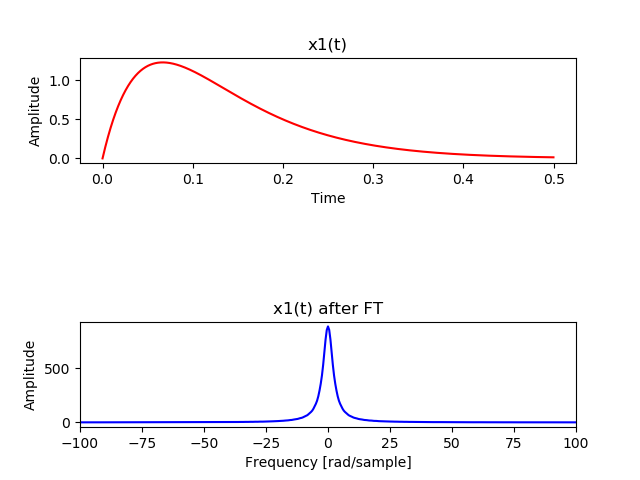

<IPython.core.display.Javascript object>


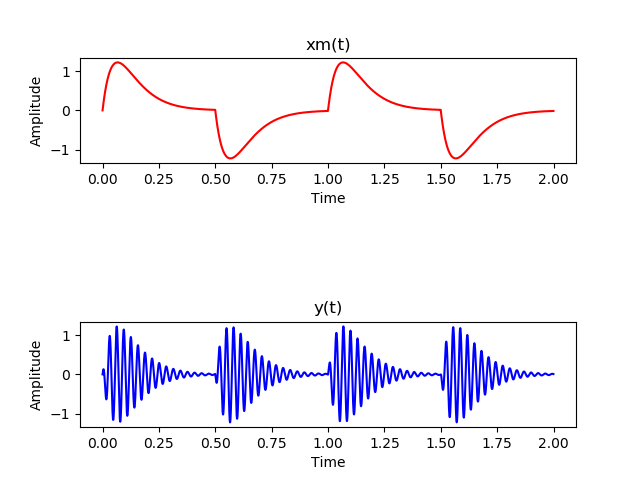

<IPython.core.display.Javascript object>


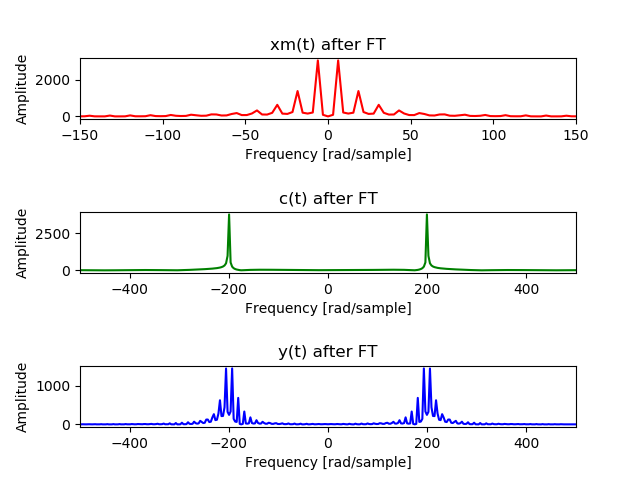

In [3]:
# Assignment 2 -  Amplitude Modulation
#Part A
fs = 4000
t = np.arange(0, 0.5, 1/fs)
ut = np.heaviside(t, 1)
x1 = 50 * t * np.exp(-15*t) * ut
x0 = -x1

x2 = np.fft.fft(x1, 8192)
x2 = np.fft.fftshift(x2)
x2 = np.abs(x2)
f = np.arange(-fs/2, fs/2, fs/8192)

fig = plt.figure(3)
fig.subplots_adjust(hspace = 1.5, wspace = 0.7)

plt.subplot(2, 1, 1)
plt.title('x1(t)')
plt.plot(t, x1, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')

plt.subplot(2, 1, 2)
plt.title('x1(t) after FT')
plt.plot(f, x2, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-100, 100)
plt.show()

#Part B
xm = np.concatenate([x1, x0, x1, x0])
t_m = np.arange(0, len(xm)/fs, 1/fs)
ct = np.cos(200*t_m)
yt = xm * ct

#Part C
fig = plt.figure(4)
fig.subplots_adjust(hspace = 1.5, wspace = 0.7)

plt.subplot(2, 1, 1)
plt.title('xm(t)')
plt.plot(t_m, xm, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')

plt.subplot(2, 1, 2)
plt.title('y(t)')
plt.plot(t_m, yt, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()

#Part D
xm_ft = np.fft.fft(xm, 8192)
xm_ft = np.fft.fftshift(xm_ft)
xm_ft = np.abs(xm_ft)

ct_ft = np.fft.fft(ct, 8192)
ct_ft = np.fft.fftshift(ct_ft)
ct_ft = np.abs(ct_ft)

yt_ft = np.fft.fft(yt, 8192)
yt_ft = np.fft.fftshift(yt_ft)
yt_ft = np.abs(yt_ft)
f = np.arange(-fs/2, fs/2, fs/8192)
w = f * 2 * np.pi

fig = plt.figure(5)
fig.subplots_adjust(hspace = 1.5, wspace = 0.7)

plt.subplot(3, 1, 1)
plt.title('xm(t) after FT')
plt.plot(w, xm_ft, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-150, 150)

plt.subplot(3, 1, 2)
plt.title('c(t) after FT')
plt.plot(w, ct_ft, color = 'g')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-500, 500)

plt.subplot(3, 1, 3)
plt.title('y(t) after FT')
plt.plot(w, yt_ft, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-500, 500)
plt.show()

###  Discussion

Because this system is not linear according to the graph

<IPython.core.display.Javascript object>


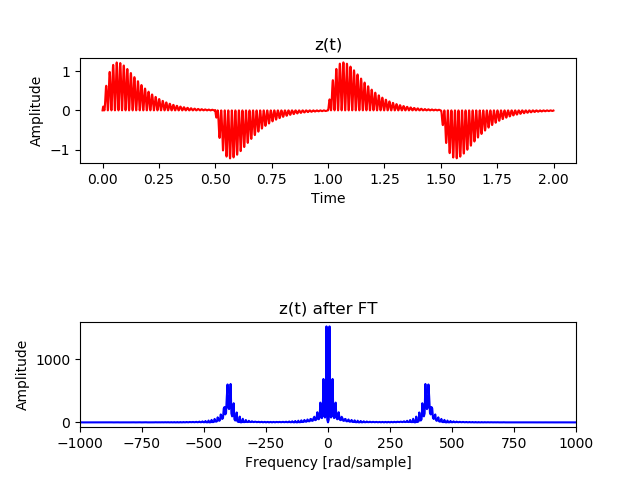

C:\Users\kevin\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1551: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


<IPython.core.display.Javascript object>


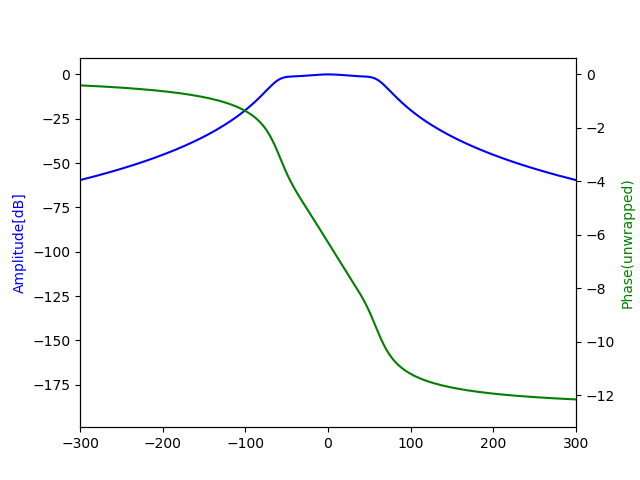

<IPython.core.display.Javascript object>


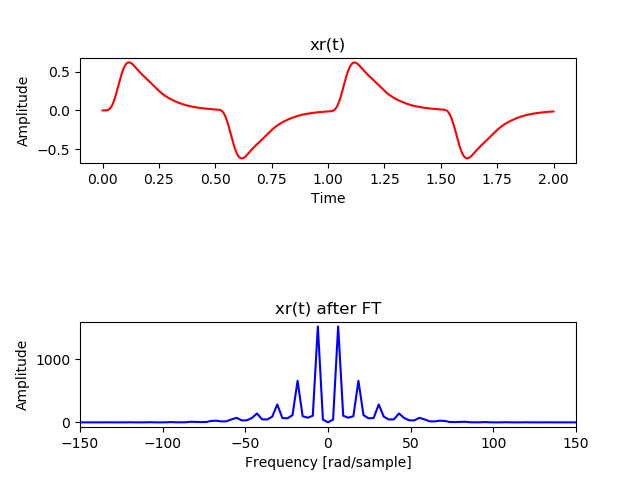

In [4]:
# Assignment 3 -  Amplitude Demodulation
#Part A
zt = yt * ct
zt_ft = np.fft.fft(zt, 8192)
zt_ft = np.fft.fftshift(zt_ft)
zt_ft = np.abs(zt_ft)
f = np.arange(-fs/2, fs/2, fs/8192)
w = f * 2 * np.pi

fig = plt.figure(6)
fig.subplots_adjust(hspace = 1.5, wspace = 0.7)

plt.subplot(2, 1, 1)
plt.title('z(t)')
plt.plot(t_m, zt, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')

plt.subplot(2, 1, 2)
plt.title('z(t) after FT')
plt.plot(w, zt_ft, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-1000, 1000)
plt.show()

#Part B
b = [0, 2*10**9]
a = [240, 3*10**4, 2.2*10**6, 10**8, 2*10**9]
sys = signal.lti(b,a)
nfft = 8192
f = np.arange(-nfft/2,nfft/2,1)*fs/nfft
w = f * 2 * np.pi
w2, h_f = signal.freqresp(sys, w)
angle = np.unwrap(np.angle(h_f))

fig = plt.figure(7)

ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h_f)), color = 'b', label = 'magnitude')
plt.ylabel('Amplitude[dB]', color = 'b')

ax2 = ax1.twinx()
plt.plot(w, angle, color = 'g', label = 'phase')
plt.ylabel('Phase(unwrapped)', color = 'g')
plt.xlim(-300, 300)
plt.show()

#Part C
xr_t, xr, xs = signal.lsim((b, a), zt, t_m)
xr_ft = np.fft.fft(xr, 8192)
xr_ft = np.fft.fftshift(xr_ft)
xr_ft = np.abs(xr_ft)
f = np.arange(-fs/2, fs/2, fs/8192)
w = f * 2 * np.pi

fig = plt.figure(8)
fig.subplots_adjust(hspace = 1.5, wspace = 0.7)

plt.subplot(2, 1, 1)
plt.title('xr(t)')
plt.plot(xr_t, xr, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')

plt.subplot(2, 1, 2)
plt.title('xr(t) after FT')
plt.plot(w, xr_ft, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-150, 150)
plt.show()

###  Discussion

because x1t decays faster than xt so this will be incorrect

In [63]:
# Assignment 4: Decoding a Morse Code Message
#Part A
def decode(x, fs):
    morse = [".-", "-...","-.-.","-..",".","..-.","--.","....","..",".---","-.-",".-..","--","-.","---",".--.","--.-",".-.","...","-","..-","...-",".--","-..-","-.--","--.."]
    alphabet = ["A", "B", "C", "D", "E", "F", "G", "H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
    
    code1 = x[0 : int(0.5 * fs)]
    code2 = x[int(0.5 * fs): int(1 * fs)]
    code3 = x[int(1 * fs) : int(1.5 * fs)]
    code4 = x[int(1.5 * fs): int(2 * fs)]
    code = code1, code2, code3, code4
    
    t = np.arange(0, 0.5, 1/fs)
    ut = np.heaviside(t, 1)
    x1 = 50*t*ut*np.exp(-15*t)
    x0 = -x1
    
    morseCode = ""
    for i in range(0, 4):
        if(abs(np.sum(code[i])) > 100):
            error1 = np.sum((code[i] - x1) ** 2)
            error2 = np.sum((code[i] - x0) ** 2)
            
            if (error1 > error2):
                morseCode = morseCode + "."
            else: 
                morseCode = morseCode + "-"
                    
    word = ""
    for x in range(0, len(morse)):
        if (morse[x] == morseCode):
            word = alphabet[x]
    
    return word

In [64]:
#Part B
file = open('message_modulated.csv', 'rb')
rm = np.loadtxt(file, delimiter=',')

#Part C
fs = 4000
t = np.arange(0, 0.5, 1/fs)
ut = np.heaviside(t, 1)
x1 = 50*t*ut*np.exp(-15*t)
x0 = -x1
t0 = np.arange(0, 2, 1/fs)

b = [0, 2*10**9]
a = [240, 3*10**4, 2.2*10**6, 10**8, 2*10**9]

for i in range(0,3):
    y = np.cos(100 * (2**i) * t0)
    m = rm * y
    mr_t, mr, mr_s = signal.lsim((b, a), m, t0)
    print(decode(mr, fs))

Y
O
U


C:\Users\kevin\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1551: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


###  Discussion

YOU